### Testing the models on some images
#### Performing a license plate `Detection` And `Recognition` task using the models we had trained.

In [1]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.6 MB/s eta 0:00:00


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Detecting plate and its keypoints using our trained yolov8n-pose.pt model

In [9]:
!gdown 1NvXiHn0OW7MN44GZ4JCBWWwtZjJVkVGQ

Downloading...
From: https://drive.google.com/uc?id=1NvXiHn0OW7MN44GZ4JCBWWwtZjJVkVGQ
To: /content/plate_keypoints_detector.pt
100% 6.41M/6.41M [00:00<00:00, 43.6MB/s]


In [10]:
!gdown 1HHUwzRRCdLyjAusTFzB0oAsZVn8_5N1l

Downloading...
From: https://drive.google.com/uc?id=1HHUwzRRCdLyjAusTFzB0oAsZVn8_5N1l
To: /content/20240425_082950.JPG
100% 469k/469k [00:00<00:00, 6.31MB/s]


In [11]:
from ultralytics import YOLO

# loading our trained model
model = YOLO('plate_keypoints_detector.pt')

# perform prediction on an image
results = model('/content/20240425_082950.JPG')

# access keypoints
for result in results:
    print(result.keypoints.xy.cpu().numpy())

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/20240425_082950.JPG: 640x480 1 license_plate, 341.7ms
Speed: 17.1ms preprocess, 341.7ms inference, 29.0ms postprocess per image at shape (1, 3, 640, 480)
[[[     532.65      837.66]
  [     672.01      856.26]
  [     669.38      888.97]
  [     530.02       868.3]]]


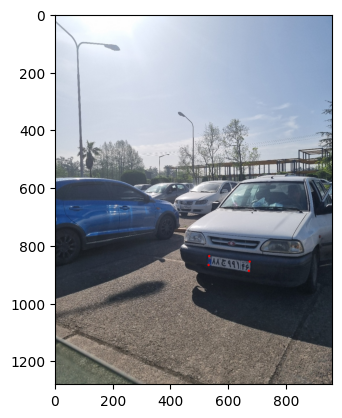

In [12]:
import cv2
original_test_image = cv2.imread('/content/20240425_082950.JPG')
img = original_test_image.copy()
# img = cv2.resize(img, (640,640))
keyps = result.keypoints.xy.cpu().numpy().astype('int32')[0]
cv2.circle(img, (keyps[0,0],keyps[0,1]), 4, (0,0,255), -1)
cv2.circle(img, (keyps[1,0],keyps[1,1]), 4, (0,0,255), -1)
cv2.circle(img, (keyps[2,0],keyps[2,1]), 4, (0,0,255), -1)
cv2.circle(img, (keyps[3,0],keyps[3,1]), 4, (0,0,255), -1)

plt.imshow(img[...,::-1])

___

#### Perspective Transform

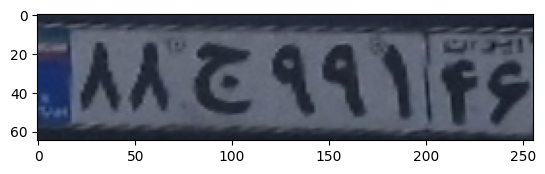

In [13]:
img2 = original_test_image.copy()

plate_corners = np.float32([
    [keyps[0,0],keyps[0,1]-5],  # Top-left
    [keyps[1,0],keyps[1,1]-5],  # Top-right
    [keyps[2,0],keyps[2,1]+5],  # Bottom-right
    [keyps[3,0],keyps[3,1]+5]   # Bottom-left
])

dst_points = np.float32([
    [0, 0],           # Top-left
    [256 -1, 0],     # Top-right
    [256 - 1, 65 - 1], # Bottom-right
    [0, 65 - 1]       # Bottom-left
])

M = cv2.getPerspectiveTransform(plate_corners, dst_points)

# apply the perspective transformation
transformed_plate = cv2.warpPerspective(img2, M, (256, 65))
plt.imshow(transformed_plate[...,::-1])

### Plate Recognition using our trained keras model

In [14]:
!gdown 1wyM47vcu7x-ZWD1qErO4F4JpWTpBtzhp

Downloading...
From: https://drive.google.com/uc?id=1wyM47vcu7x-ZWD1qErO4F4JpWTpBtzhp
To: /content/license_plate_recognition.keras
100% 6.61M/6.61M [00:00<00:00, 58.6MB/s]


In [15]:
loaded_model = tf.keras.models.load_model('license_plate_recognition.keras')

In [21]:
characters = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'H', 'J', 'K', 'L', 'M', 'N', 'S', 'T', 'V', 'X', 'Y', 'Z']

In [22]:
# Mapping characters to integers
char_to_num = layers.StringLookup(
    vocabulary=list(characters), mask_token=None
)

# Mapping integers back to original characters
num_to_char = layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

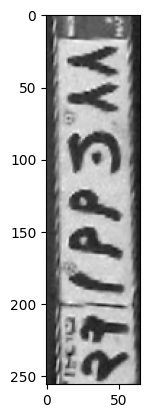

In [23]:
img = transformed_plate.copy()

img = tf.convert_to_tensor(img, dtype=tf.float32)
img = img / 255.0
img = tf.image.rgb_to_grayscale(img)
img = tf.image.resize(img, [65, 256])
img = tf.transpose(img, perm=[1, 0, 2])
plt.imshow(tf.squeeze(img), cmap='gray')
plt.show()

In [24]:
img = img[np.newaxis,...]
img.shape

TensorShape([1, 256, 65, 1])

In [25]:
preds = loaded_model.predict(img, verbose=0)
preds = preds.argmax(axis=-1)
pred_texts = []
for p in preds:
    label = tf.strings.reduce_join(num_to_char(p)).numpy().decode("utf-8")
    pred_texts.append(label)

pred_texts[0]

'88J99146'

___

___

### Writing a straight-forward function for this task

In [68]:
# writing a straight-forward function for license plate detection and recognitio

characters = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'H', 'J', 'K', 'L', 'M', 'N', 'S', 'T', 'V', 'X', 'Y', 'Z']


# Mapping characters to integers
char_to_num = layers.StringLookup(
    vocabulary=list(characters), mask_token=None
)

# Mapping integers back to original characters
num_to_char = layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

def plate_detection_and_recognition(img_path):
    results = model(img_path)

    # 1- Keypoint Detection
    original_test_image = cv2.imread(img_path)
    img = original_test_image.copy()

    for result in results:
        keyps = result.keypoints.xy.cpu().numpy().astype('int32')[0]


    # 2 - Perspective transformation
    plate_corners = np.float32([
        [keyps[0,0],keyps[0,1]-5],  # Top-left
        [keyps[1,0],keyps[1,1]-5],  # Top-right
        [keyps[2,0],keyps[2,1]+5],  # Bottom-right
        [keyps[3,0],keyps[3,1]+5]   # Bottom-left
    ])

    dst_points = np.float32([
        [0, 0],           # Top-left
        [256 -1, 0],     # Top-right
        [256 - 1, 65 - 1], # Bottom-right
        [0, 65 - 1]       # Bottom-left
    ])

    M = cv2.getPerspectiveTransform(plate_corners, dst_points)
    transformed_plate = cv2.warpPerspective(img, M, (256, 65))
    trp = transformed_plate.copy()

    # 3 - Preprocessing plate for recognition task
    trp = tf.convert_to_tensor(trp, dtype=tf.float32)
    trp = trp / 255.0
    trp = tf.image.rgb_to_grayscale(trp)
    trp = tf.image.resize(trp, [65, 256])
    trp = tf.transpose(trp, perm=[1, 0, 2])
    trp = trp[np.newaxis,...]

    preds = loaded_model.predict(trp, verbose=0)
    preds = preds.argmax(axis=-1)
    pred_texts = []
    for p in preds:
        label = tf.strings.reduce_join(num_to_char(p)).numpy().decode("utf-8")
        pred_texts.append(label)

    # 4- drawing a quadrilateral around the plate, and write the number above it
    points = np.array([[keyps[0,0],keyps[0,1]], [keyps[1,0],keyps[1,1]], [keyps[2,0],keyps[2,1]], [keyps[3,0],keyps[3,1]]], np.int32)
    points = points.reshape((-1, 1, 2))
    cv2.polylines(img, [points], isClosed=True, color=(255, 10, 255), thickness=2)

    points = np.array([[keyps[0,0],keyps[0,1]], [keyps[1,0],keyps[1,1]], [keyps[1,0],np.min([keyps[0,1],keyps[1,1]])-30], [keyps[0,0], np.min([keyps[0,1],keyps[1,1]])-30]], np.int32)
    points = points.reshape((-1, 1, 2))
    cv2.fillPoly(img, [points], color=(255, 10, 255))

    text = pred_texts[0]
    position = (keyps[0,0],np.min([keyps[0,1],keyps[1,1]]))  # Bottom-left corner of the text
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.8

    # cv2.putText(img, text, position, font, font_scale, (255,255,255), 4) #this acts like shadow
    cv2.putText(img, text, position, font, font_scale, (0,0,50), 2)


    img[5:70,5:261]= transformed_plate
    cv2.rectangle(img, [5,5], [261,70], (255,10,255), 2)

    plt.imshow(img[...,::-1])

    return pred_texts[0]


image 1/1 /content/20240425_082950.JPG: 640x480 1 license_plate, 176.6ms
Speed: 4.4ms preprocess, 176.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


'88J99146'

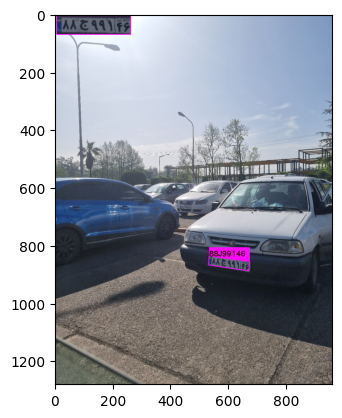

In [69]:
plate_detection_and_recognition('/content/20240425_082950.JPG')

#### Testing other images


image 1/1 /content/20240425_082841.JPG: 640x480 1 license_plate, 216.7ms
Speed: 4.6ms preprocess, 216.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


'58H54146'

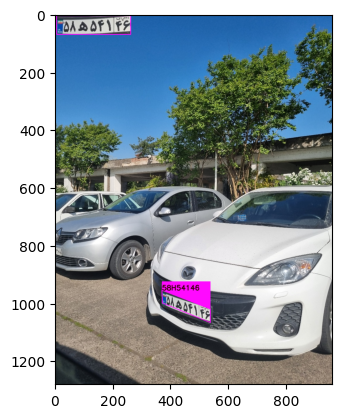

In [ ]:
# an example of the very much transformed plate
plate_detection_and_recognition('/content/20240425_082841.JPG')


image 1/1 /content/test_plate_2.jpg: 640x640 1 license_plate, 267.6ms
Speed: 6.4ms preprocess, 267.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


'31C63777'

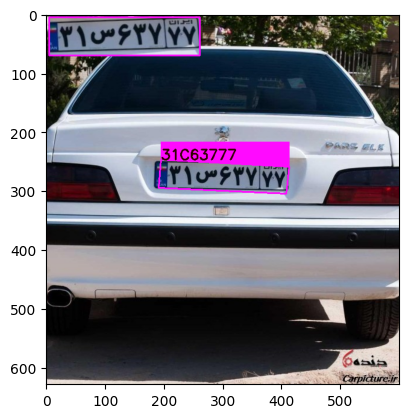

In [ ]:
plate_detection_and_recognition('test_plate_2.jpg')


image 1/1 /content/test_plate_4.jpg: 448x640 1 license_plate, 315.2ms
Speed: 4.4ms preprocess, 315.2ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


'18X26744'

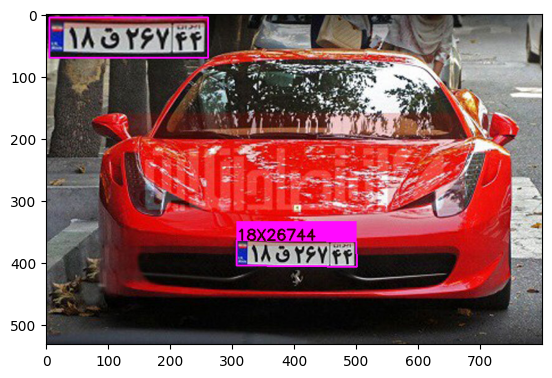

In [ ]:
plate_detection_and_recognition('test_plate_4.jpg')

___

### Writing the original farsi characters on input images.

In [4]:
! pip install pillow arabic-reshaper python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 16.1 MB/s eta 0:00:00


In [31]:
!gdown 14fKlGwktrBXTRyxsFvzeeQMsm3ja9Aql

Downloading...
From: https://drive.google.com/uc?id=14fKlGwktrBXTRyxsFvzeeQMsm3ja9Aql
To: /content/B-NAZANIN.TTF
100% 60.8k/60.8k [00:00<00:00, 50.8MB/s]


In [77]:
characters = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'الف', 'ب', 'س', 'د', 'ه', 'ج', 'ط', 'ل', 'م', 'ن', 'ص', 'ت', 'و', 'ق', 'ی', 'ع']

char_to_num = layers.StringLookup(
    vocabulary=list(characters), mask_token=None)

num_to_char = layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True)

In [78]:
import arabic_reshaper
from bidi.algorithm import get_display
from PIL import Image, ImageFont, ImageDraw

def write_farsi_text(image, farsi_text, size=40, point=(10,10), color=(0,0,0)):
    text_to_be_reshaped = farsi_text
    reshaped_text = arabic_reshaper.reshape(text_to_be_reshaped) # seperated chars problem
    bidi_text = get_display(reshaped_text) #direction problem
    text = bidi_text.encode().decode('utf-8') #encoding problem (rectangular boxes!)
    pil_image = Image.fromarray(image)
    font = ImageFont.truetype("B-NAZANIN.TTF", size, encoding='unic')
    draw = ImageDraw.Draw(pil_image)
    draw.text(point, text, color, font=font)
    return np.array(pil_image)

In [87]:
def plate_detection_and_recognition(img_path):
    results = model(img_path)

    # 1- Keypoint Detection
    original_test_image = cv2.imread(img_path)
    img = original_test_image.copy()

    for result in results:
        keyps = result.keypoints.xy.cpu().numpy().astype('int32')[0]


    # 2 - Perspective transformation
    plate_corners = np.float32([
        [keyps[0,0],keyps[0,1]-5],  # Top-left
        [keyps[1,0],keyps[1,1]-5],  # Top-right
        [keyps[2,0],keyps[2,1]+5],  # Bottom-right
        [keyps[3,0],keyps[3,1]+5]   # Bottom-left
    ])

    dst_points = np.float32([
        [0, 0],           # Top-left
        [256 -1, 0],     # Top-right
        [256 - 1, 65 - 1], # Bottom-right
        [0, 65 - 1]       # Bottom-left
    ])

    M = cv2.getPerspectiveTransform(plate_corners, dst_points)
    transformed_plate = cv2.warpPerspective(img, M, (256, 65))
    trp = transformed_plate.copy()

    # 3 - Preprocessing plate for recognition task
    trp = tf.convert_to_tensor(trp, dtype=tf.float32)
    trp = trp / 255.0
    trp = tf.image.rgb_to_grayscale(trp)
    trp = tf.image.resize(trp, [65, 256])
    trp = tf.transpose(trp, perm=[1, 0, 2])
    trp = trp[np.newaxis,...]

    preds = loaded_model.predict(trp, verbose=0)
    preds = preds.argmax(axis=-1)
    pred_texts = []
    for p in preds:
        label = tf.strings.reduce_join(num_to_char(p)).numpy().decode("utf-8")
        pred_texts.append(label)

    # 4- drawing a quadrilateral around the plate, and write the plate characters above it
    points = np.array([[keyps[0,0],keyps[0,1]], [keyps[1,0],keyps[1,1]], [keyps[2,0],keyps[2,1]], [keyps[3,0],keyps[3,1]]], np.int32)
    points = points.reshape((-1, 1, 2))
    cv2.polylines(img, [points], isClosed=True, color=(255, 10, 255), thickness=2)

    points = np.array([[keyps[0,0],keyps[0,1]], [keyps[1,0],keyps[1,1]], [keyps[1,0],np.min([keyps[0,1],keyps[1,1]])-30], [keyps[0,0], np.min([keyps[0,1],keyps[1,1]])-30]], np.int32)
    points = points.reshape((-1, 1, 2))
    cv2.fillPoly(img, [points], color=(255, 10, 255))

    # text = pred_texts[0]
    # position = (keyps[0,0],np.min([keyps[0,1],keyps[1,1]]))  # Bottom-left corner of the text
    # font = cv2.FONT_HERSHEY_SIMPLEX
    # font_scale = 0.8

    # # cv2.putText(img, text, position, font, font_scale, (255,255,255), 4) #this acts like shadow
    # cv2.putText(img, text, position, font, font_scale, (0,0,50), 2)


    text = pred_texts[0]
    position = (keyps[0,0],np.min([keyps[0,1],keyps[1,1]])-30)  # Bottom-left corner of the text
    size = 35

    img = write_farsi_text(img, text, size, position, color=(0,0,0))

    # also putting the transformed plate above image (optional)
    img[5:70,5:261]= transformed_plate
    cv2.rectangle(img, [5,5], [261,70], (255,10,255), 2)

    return pred_texts[0], img


image 1/1 /content/20240425_082950.JPG: 640x480 1 license_plate, 186.2ms
Speed: 4.3ms preprocess, 186.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


(-0.5, 959.5, 1279.5, -0.5)

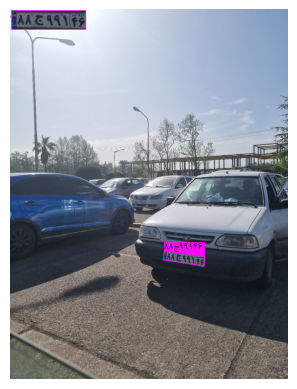

In [96]:
pred, out_img = plate_detection_and_recognition('/content/20240425_082950.JPG')
plt.imshow(out_img[...,::-1]); plt.axis('off')


image 1/1 /content/20240425_082841.JPG: 640x480 1 license_plate, 309.2ms
Speed: 5.9ms preprocess, 309.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


(-0.5, 959.5, 1279.5, -0.5)

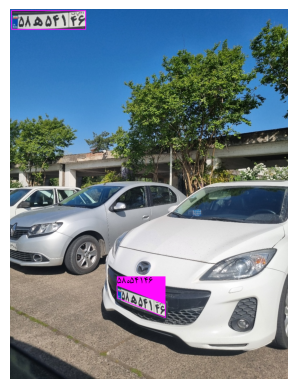

In [99]:
# an example of a very much transformed plate
pred, out_img = plate_detection_and_recognition('/content/20240425_082841.JPG')
plt.imshow(out_img[...,::-1]); plt.axis('off')


image 1/1 /content/test_plate_2.jpg: 640x640 1 license_plate, 435.6ms
Speed: 5.9ms preprocess, 435.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


(-0.5, 599.5, 628.5, -0.5)

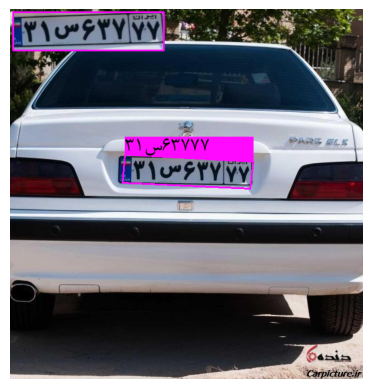

In [107]:
pred, out_img = plate_detection_and_recognition('/content/test_plate_2.jpg')
plt.imshow(out_img[...,::-1]); plt.axis('off')


image 1/1 /content/test_plate_4.jpg: 448x640 1 license_plate, 272.0ms
Speed: 16.2ms preprocess, 272.0ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


(-0.5, 799.5, 531.5, -0.5)

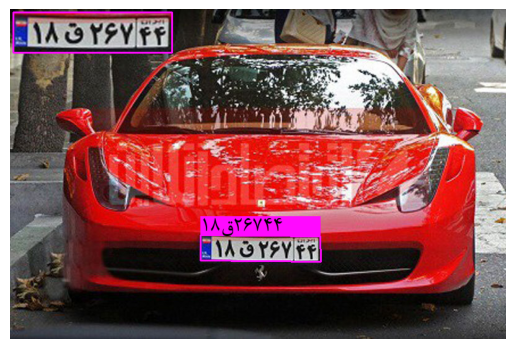

In [93]:
pred, out_img = plate_detection_and_recognition('/content/test_plate_4.jpg')
plt.imshow(out_img[...,::-1]); plt.axis('off')

In [98]:
cv2.imwrite('recognition_test.jpg', out_img)

True